In [50]:
%matplotlib inline

import json
import random
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from collections import Counter

from scipy.sparse import lil_matrix

from sklearn.neighbors import DistanceMetric

from sklearn.metrics import jaccard_score
from sklearn.metrics import pairwise_distances

from sklearn.cluster import KMeans

In [51]:
data= pd.read_csv('QBData.csv')

In [52]:
data_filtered = data[data['completions'] >= 30].set_index('playerName')
data_filtered.drop('Unnamed: 0', axis = 1, inplace = True)

In [53]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data_filtered)
    distortions.append(kmeanModel.inertia_)

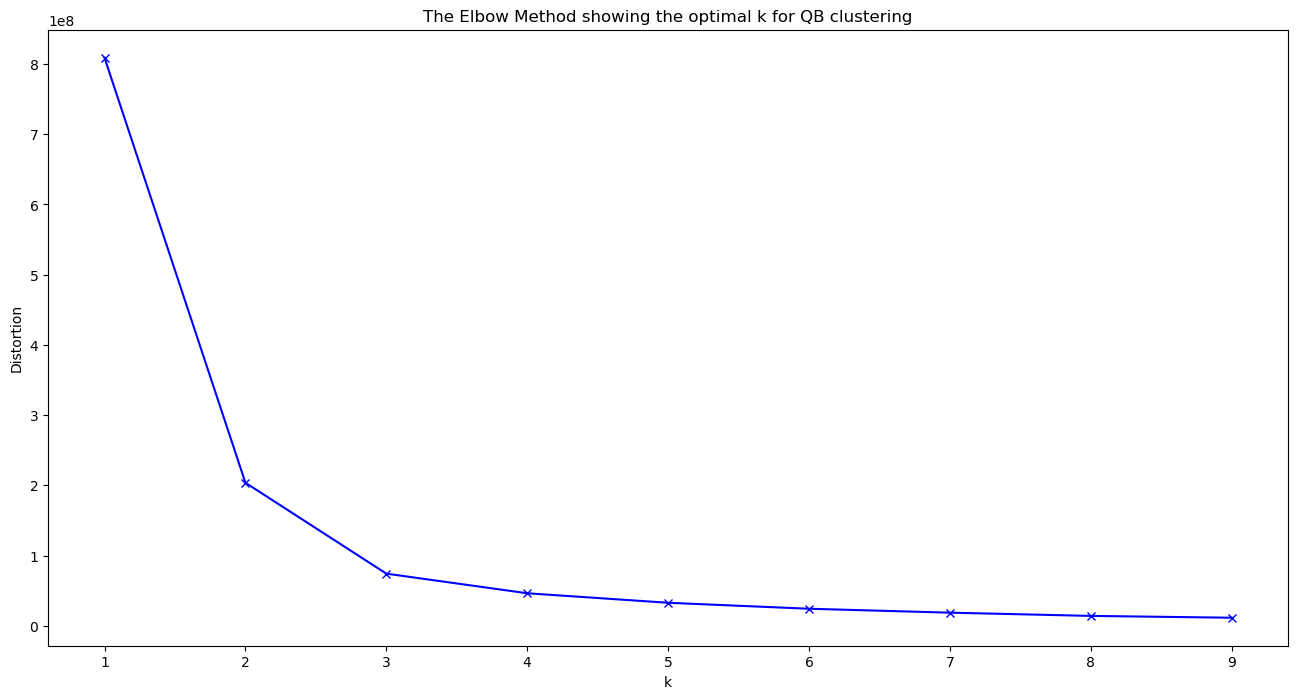

In [70]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k for QB clustering')
plt.show()

In [66]:
k = 3
model = KMeans(n_clusters = k)
model.fit(data_filtered)

KMeans(n_clusters=3)

In [67]:
data_filtered["cluster"] = model.labels_

In [68]:
clustered_data = data_filtered[["cluster"]]

In [69]:
clustered_data

,cluster
playerName,
Patrick Mahomes,1
Justin Herbert,1
Tom Brady,1
Kirk Cousins,1
Joe Burrow,1
Jared Goff,1
Josh Allen,1
Geno Smith,1
Trevor Lawrence,1
